<a href="https://colab.research.google.com/github/NgoMinhQuang/BaiTapAI_ANN/blob/main/robot2dof.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
#import library
import numpy as np
import pandas as pd
from keras.layers import Dense,Dropout
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential

In [13]:
#create data
import matplotlib.pyplot as plt
import math
import csv
import numpy as np
u=[]
z=[]
t1=np.arange(0,180.1,1)
t2=np.arange(0,180.1,1)
for i in t1:

  for j in t2:
    x=50*math.cos(math.radians(i))+40*math.cos(math.radians(i+j))
    y=50*math.sin(math.radians(i))+40*math.sin(math.radians(i+j))
    
    z.append(np.array((i,j,x,y)))
  u.extend(z)

In [3]:
header = ['anpha', 'beta', 'x', 'y']
with open('robot_2b.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)

    # write the header
    writer.writerow(header)

    # write multiple rows
    writer.writerows(u)

In [14]:
#data processing
import pandas as pd
data = pd.read_csv('robot_2b.csv')
data.shape
numpy_dataset = data.values
y=numpy_dataset[:,:2]/180.0
x=(numpy_dataset[:,2:]+90)/180.0
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20)

In [5]:
print("Shape of data is: ",x_train.shape)
print("Shape of data is: ",y_train.shape)

Shape of data is:  (2385000, 2)
Shape of data is:  (2385000, 2)


In [15]:
#train model
model = Sequential() 
model.add(Dense(128, activation='relu', input_shape = (2,))) 
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(2))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               384       
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 2)                 66        
                                                                 
Total params: 10,786
Trainable params: 10,786
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(loss='mae', optimizer =Adam(), metrics=['acc'])
history = model.fit(x_train, y_train, batch_size = 32, epochs = 5, validation_split = 0.2)

Epoch 1/5
59625/59625 [==============================] - 153s 3ms/step - loss: 0.0106 - acc: 0.9777 - val_loss: 0.0066 - val_acc: 0.9878
Epoch 2/5
59625/59625 [==============================] - 151s 3ms/step - loss: 0.0063 - acc: 0.9857 - val_loss: 0.0038 - val_acc: 0.9901
Epoch 3/5
59625/59625 [==============================] - 152s 3ms/step - loss: 0.0053 - acc: 0.9878 - val_loss: 0.0045 - val_acc: 0.9854
Epoch 4/5
59625/59625 [==============================] - 149s 2ms/step - loss: 0.0047 - acc: 0.9889 - val_loss: 0.0032 - val_acc: 0.9914
Epoch 5/5
59625/59625 [==============================] - 150s 3ms/step - loss: 0.0044 - acc: 0.9895 - val_loss: 0.0032 - val_acc: 0.9876


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  import sys


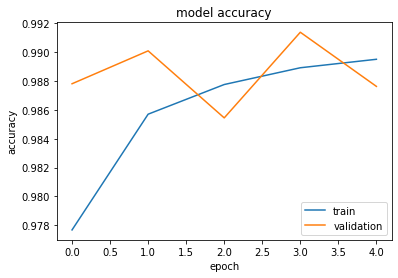

In [16]:
#consulation
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper_left')
plt.show()

In [17]:
#test
Px_test_train = (0+90)/180.0
Py_test_train = (90+90)/180.0
print(Px_test_train,Py_test_train)
test = model.predict([[Px_test_train,Py_test_train]])
t1 = test[0][0]*180
t2 = test[0][1]*180
x_1=50*math.cos(math.radians(t1))+40*math.cos(math.radians(t1+t2))
y_1=50*math.sin(math.radians(t1))+40*math.sin(math.radians(t1+t2))
print('x = ',x_1,'y = ',y_1)
print(t1,t2)

0.5 1.0
x =  87.86394861542789 y =  4.189901900603404
13.631959855556488 -24.57644283771515


In [ ]:
#save model
model.save('Robot2dof.h5')